### CONSTANTS

In [1]:
DATA_PATH = "data/predictive_maintenance.csv"
NUMERICAL_FEATURES = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                       'Torque [Nm]', 'Tool wear [min]']
CATEGORICAL_FEATURES = ['Type']
TARGET = "Target"

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from category_encoders import OneHotEncoder

### Reading Data

In [3]:
data = pd.read_csv(DATA_PATH).drop(columns=['UDI', 'Product ID', 'Failure Type'])
print(f"Data shape: {data.shape}")
data.head()

Data shape: (10000, 7)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### Feature Engineering

### 01. PCA Analysis

In [4]:
X_ = data[NUMERICAL_FEATURES]
y_ = data[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, stratify=y_)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7000, 5)
X_test shape: (3000, 5)
y_train shape: (7000,)
y_test shape: (3000,)


In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
X_train_scaled

array([[ 1.79565302,  1.745558  ,  0.91484233, -1.21999938,  0.8096194 ],
       [-0.90410452, -1.08026039, -0.22942676, -0.23480279,  1.54914976],
       [-1.40405962, -1.08026039, -0.4390206 ,  0.20753037, -1.06280852],
       ...,
       [ 0.39577874,  0.46721159, -0.0708152 , -0.06390134,  1.04563973],
       [ 0.34578323,  0.3999302 , -0.18410917, -0.44591635, -0.05578846],
       [ 1.24570241,  1.27458827,  0.08779635,  0.00646984,  1.23445599]])

In [6]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca

array([[ 2.80621318, -0.83758498,  0.78926514, -0.05421118, -0.22338693],
       [-0.94473536,  1.00737181,  1.57042124, -0.00381478, -0.34415283],
       [-1.52746211,  1.00512598, -1.04046846, -0.27310504, -0.05600087],
       ...,
       [ 0.41052453, -0.47240802,  1.03632232, -0.08153131, -0.07125344],
       [ 0.49142296, -0.26038556, -0.06097548, -0.20724328, -0.39924325],
       [ 1.25003407, -1.29732136,  1.20769583,  0.00642548,  0.06150612]])

Text(0, 0.5, 'explained variance ratio')

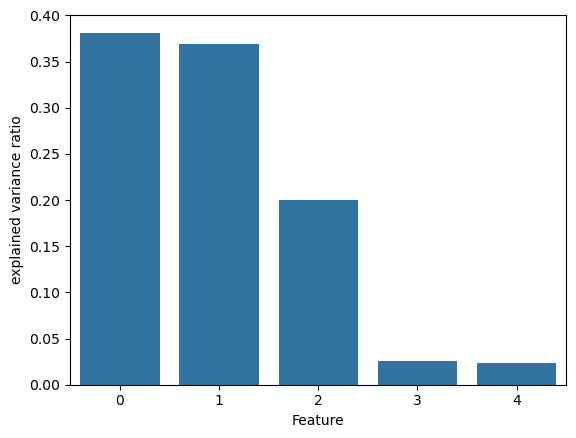

In [7]:
explained_variance = pca.explained_variance_ratio_
sns.barplot(explained_variance)
plt.xlabel('Feature')
plt.ylabel('explained variance ratio')

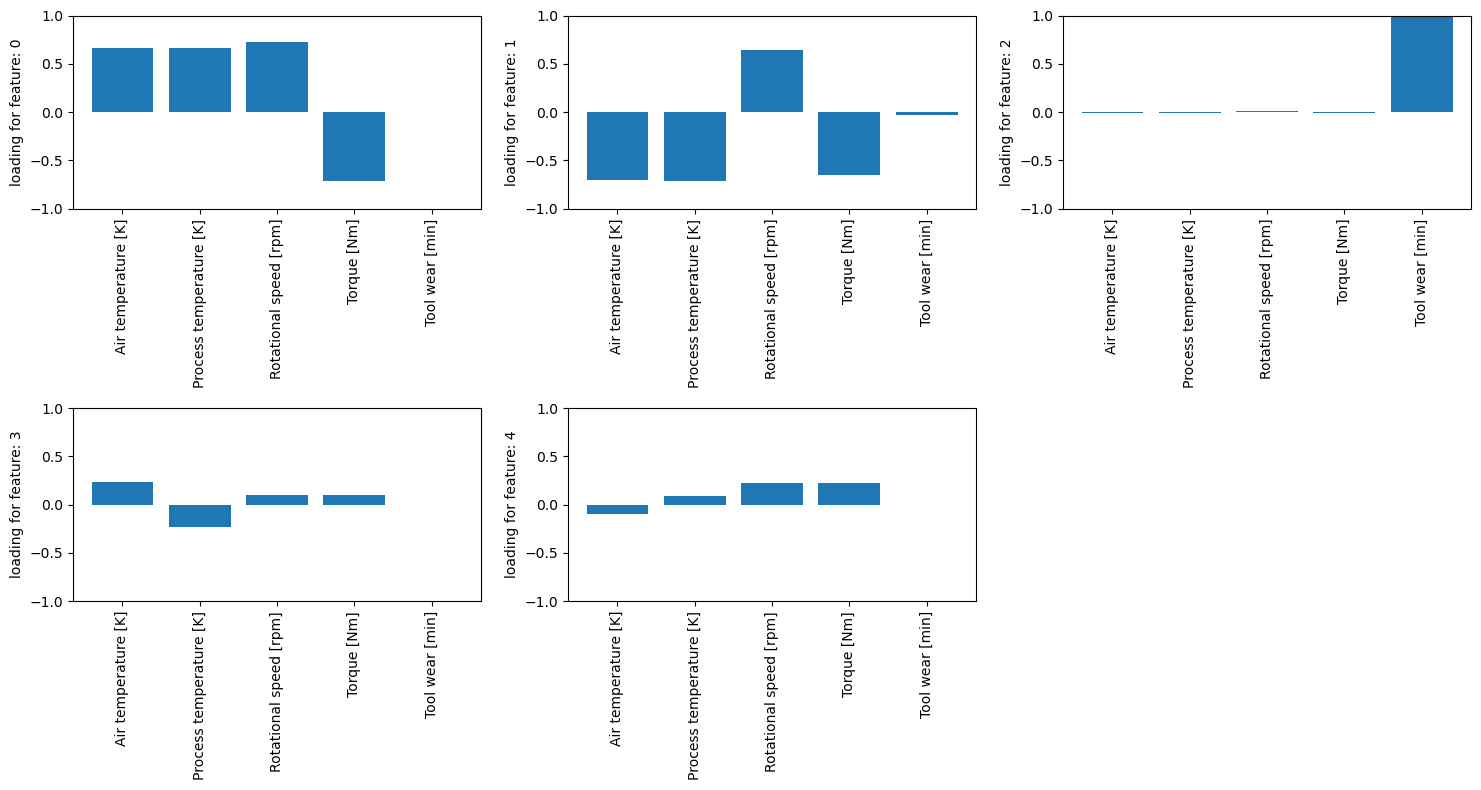

In [8]:
feature_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
rows = 2
cols = 3
fig = plt.figure(figsize=(15, 8))
for pos, i in enumerate(range(5), 1):
    fig.add_subplot(rows, cols, pos)
    plt.bar(range(5), feature_loadings[:, i])
    plt.ylabel(f"loading for feature: {i}")
    plt.xticks(range(5), NUMERICAL_FEATURES, rotation=90)
    plt.ylim([-1, 1])

plt.tight_layout()

In [9]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [10]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [11]:
df = data.copy()
df['feature_1'] = df['Air temperature [K]'] * df['Process temperature [K]']
df['feature_2'] = df['Rotational speed [rpm]'] / df['Torque [Nm]']
df['feature_3'] = df['Rotational speed [rpm]'] * df['Tool wear [min]']
df['feature_4'] = df['Torque [Nm]'] * df['Tool wear [min]']

In [12]:
df.to_csv("data/data_feature_engineered.csv", index=False)